In [108]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd



file = r'../data/DST/SP2_0C_DST/02_24_2016_SP20-2_0C_DST_80SOC.xls'
xls = pd.ExcelFile(file)
df = pd.read_excel(xls, 'Channel_1-006')

# df = pd.read_excel(open(file,'rb'), sheet_name='Channel_1-006')


# get colum names
# print(list(df))

# 


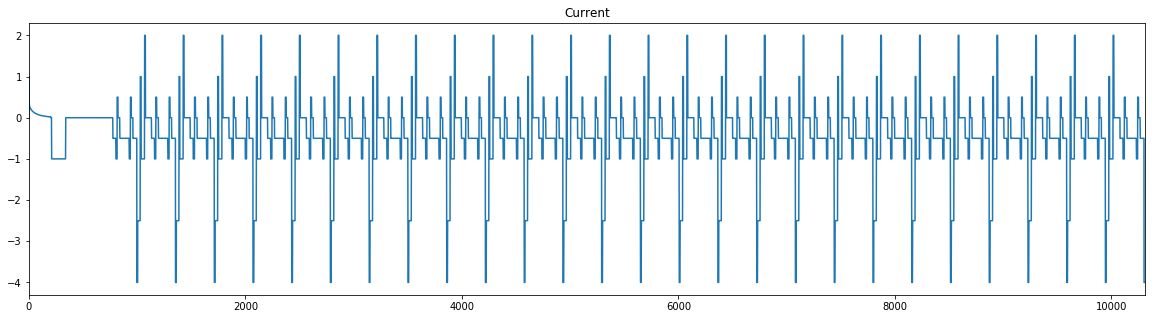

In [109]:
df['Current(A)'].plot(title='Current', figsize=(20, 5))

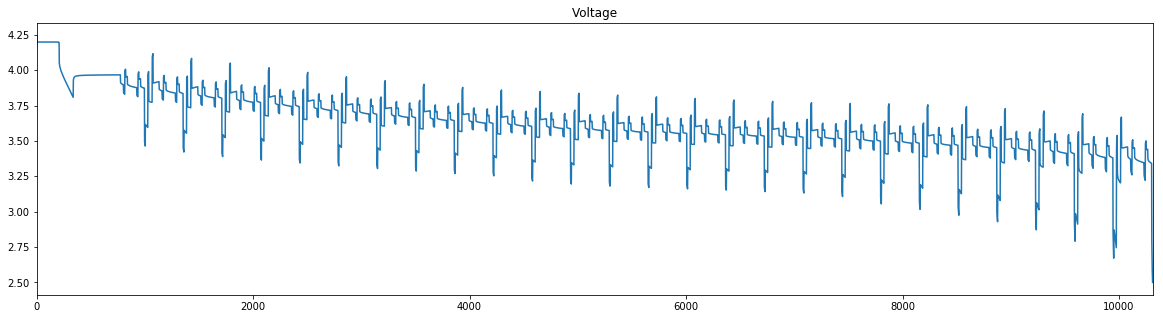

In [110]:
df['Voltage(V)'].plot(title='Voltage', figsize=(20, 5))

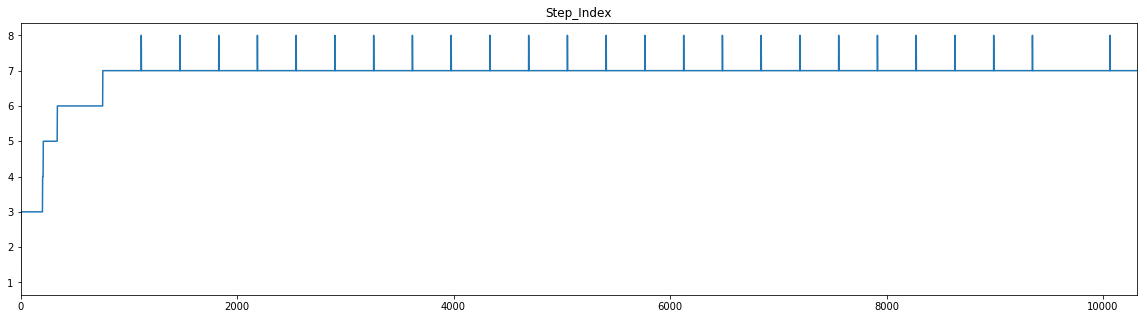

In [111]:
df['Step_Index'].plot(title='Step_Index' , figsize=(20, 5))

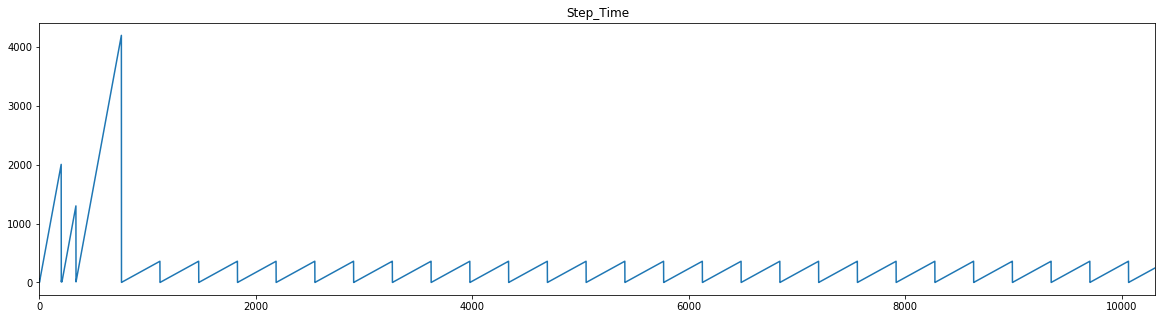

In [112]:
df['Step_Time(s)'].plot(title='Step_Time' , figsize=(20, 5))

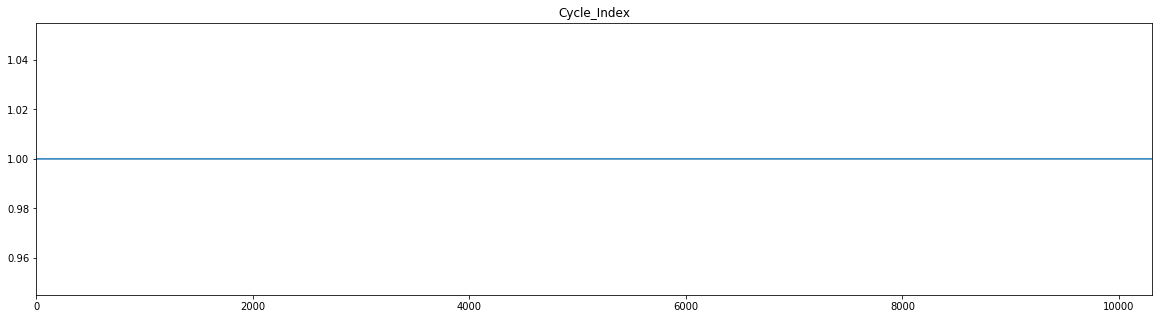

In [113]:
df['Cycle_Index'].plot(title='Cycle_Index' , figsize=(20, 5))

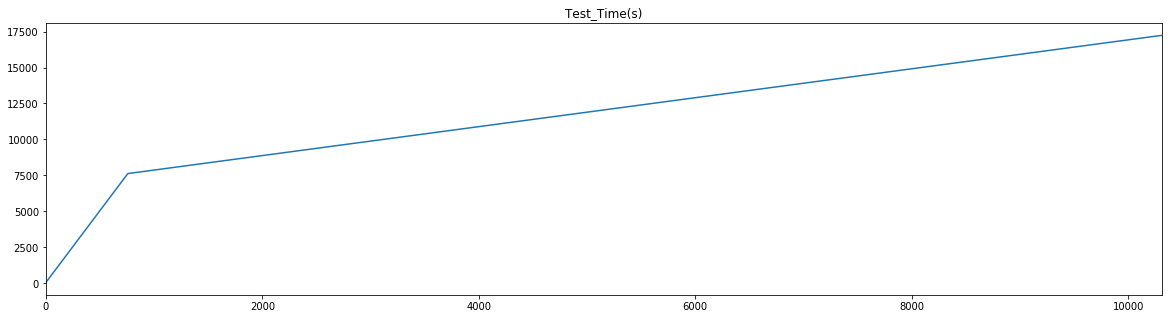

In [114]:
df['Test_Time(s)'].plot(title='Test_Time(s)' , figsize=(20, 5))

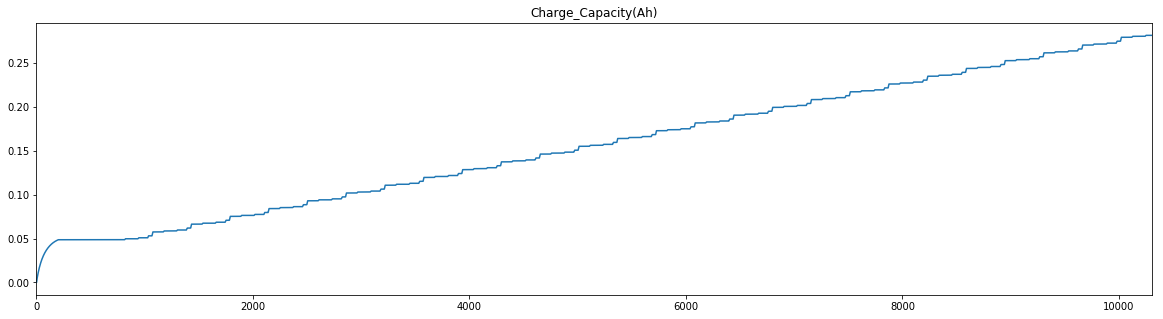

In [115]:
df['Charge_Capacity(Ah)'].plot(title='Charge_Capacity(Ah)' , figsize=(20, 5))

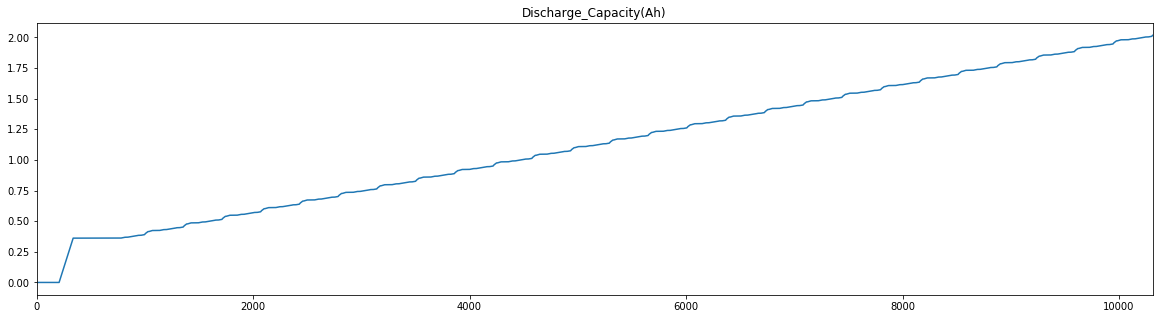

In [116]:
df['Discharge_Capacity(Ah)'].plot(title='Discharge_Capacity(Ah)' , figsize=(20, 5))

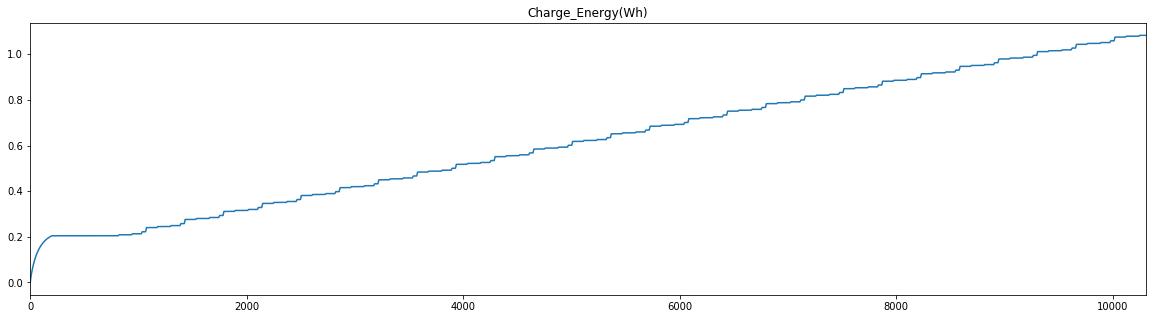

In [117]:
df['Charge_Energy(Wh)'].plot(title='Charge_Energy(Wh)' , figsize=(20, 5))

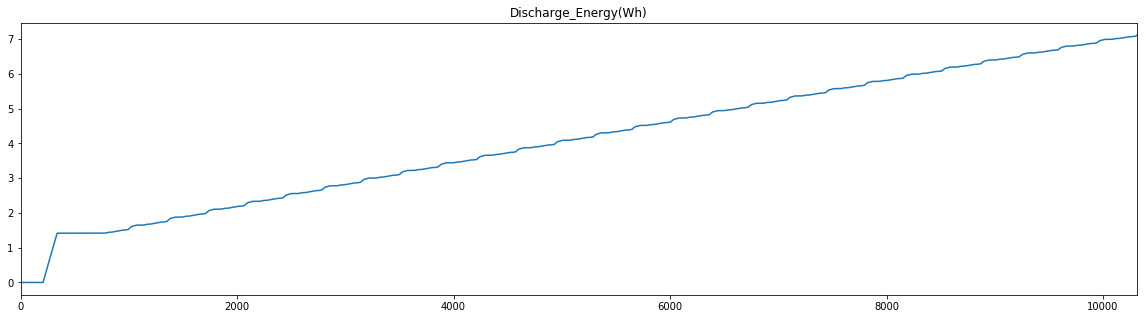

In [118]:
df['Discharge_Energy(Wh)'].plot(title='Discharge_Energy(Wh)' , figsize=(20, 5))

In [119]:
current = df['Current(A)']
voltage = df['Voltage(V)']

import numpy as np

df_soc = df[['Current(A)','Voltage(V)']]

# df_soc['SOC'] = pd.Series([soc_init], index=df.index)
df_soc = df_soc.assign(SOC=pd.Series(np.ones(len(df.index))).values)

df_soc
            

,Current(A),Voltage(V),SOC
0,0.000000,4.154059,1.0
1,0.999353,4.247043,1.0
2,0.339846,4.199741,1.0
3,0.317353,4.199903,1.0
4,0.300798,4.199903,1.0
5,0.287662,4.199741,1.0
6,0.276505,4.199741,1.0
7,0.267328,4.199741,1.0
8,0.259050,4.199741,1.0
9,0.251852,4.199741,1.0


In [120]:
# SOC calculation
for i in range(1, len(df_soc)):
    df_soc.loc[i, 'SOC'] = df_soc.loc[i-1, 'SOC'] + df_soc.loc[i-1, 'Current(A)']/7200

df_soc

,Current(A),Voltage(V),SOC
0,0.000000,4.154059,1.000000
1,0.999353,4.247043,1.000000
2,0.339846,4.199741,1.000139
3,0.317353,4.199903,1.000186
4,0.300798,4.199903,1.000230
5,0.287662,4.199741,1.000272
6,0.276505,4.199741,1.000312
7,0.267328,4.199741,1.000350
8,0.259050,4.199741,1.000387
9,0.251852,4.199741,1.000423


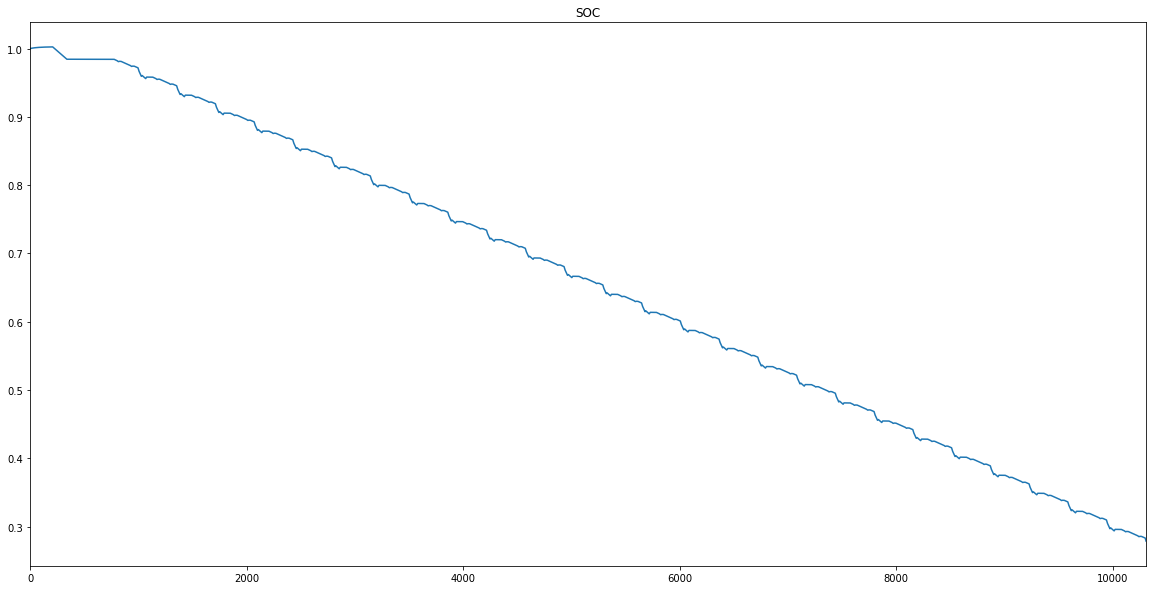

In [121]:
df_soc['SOC'].plot(title='SOC' , figsize=(20, 10))

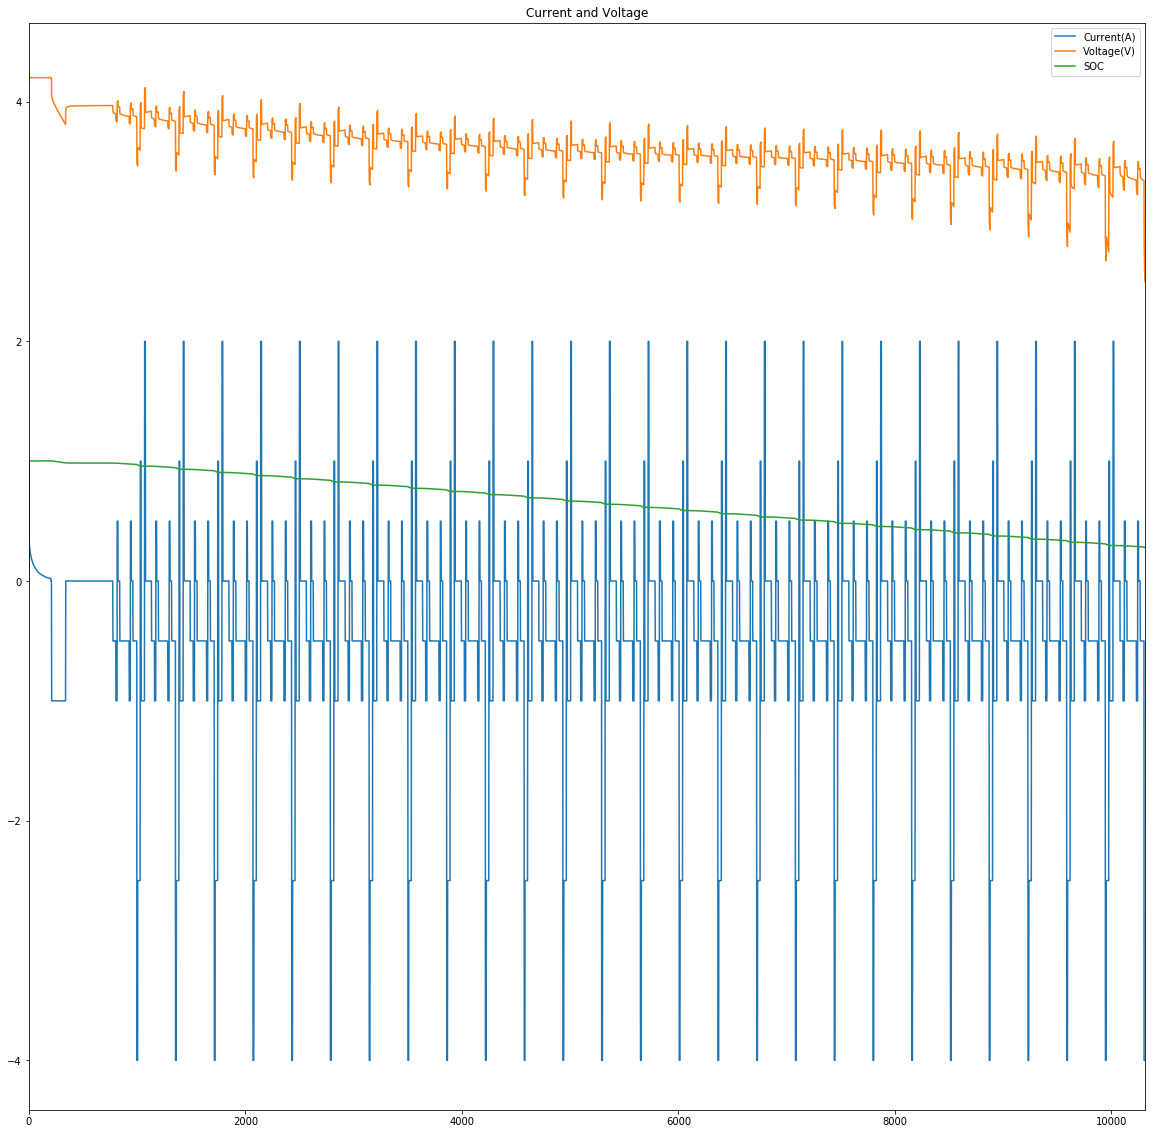

In [122]:
df_soc.plot(title='Current and Voltage' , figsize=(20, 20))
